In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2
import chess
import chess.svg

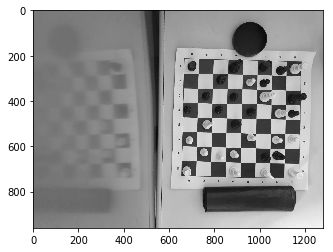

In [2]:
photo = "photo5021654756254394396"

img = cv2.imread("Jogos/RandomBoard/{}.jpg".format(photo), 0)

plt.imshow(img, cmap = "gray")

In [3]:
aux = np.zeros((400, 400), dtype = np.float32)
pts_aux = np.float32([[0,0],[aux.shape[1], 0],[aux.shape[1],aux.shape[0]],[0,aux.shape[0]]])

In [4]:
points = []
ix,iy = -1,-1

def get_points(event,x,y,flags,param):
    global ix,iy,drawing,mode, points

    if event == cv2.EVENT_LBUTTONDOWN:
        ix,iy = x,y
        #print(x, y)
        points.append([x, y])

img_r = cv2.resize(img, (int(img.shape[1]/1.4), int(img.shape[0]/1.4)))

#descomentar abaixo para clicar na tela

# cv2.imshow("click", img_r)
# cv2.setMouseCallback('click', get_points)

# while (1):
#     k = cv2.waitKey(1) & 0xFF
#     if k == ord('q') or k == 27:
#         break
        
# cv2.destroyAllWindows()


# pts1 = np.float32(points[:4])

In [5]:
pts1 = np.array([[479., 155.],
       [847., 164.],
       [840., 531.],
       [469., 522.]], dtype = np.float32)

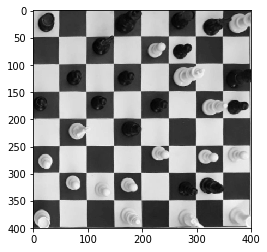

In [6]:
M = cv2.getPerspectiveTransform(pts1, pts_aux)
perspectiva = cv2.warpPerspective(img_r, M,(aux.shape[1], aux.shape[0]), aux, borderMode = cv2.BORDER_TRANSPARENT)
plt.imshow(perspectiva, cmap = "gray")

In [7]:
lst = []
for i in range(8):
    for j in range(8):
        lst.append(perspectiva[perspectiva.shape[1]*i//8:perspectiva.shape[1]*(i+1)//8, perspectiva.shape[0]*j//8:perspectiva.shape[0]*(j+1)//8])

array = np.array(lst).reshape(8, 8, 50, -1)

In [8]:
def center_image(img, p = 0.35, boolean = True):
    if boolean == False:
        return img
    w, h = img.shape
    cw, ch = w//2, h//2
    #p = 0.4 #max 0.5
    return img[int(cw - w*p): int(cw + w*p), int(ch - h*p) : int(ch + h*p)]


def show_full_board(array_geral, center = False, p = 0.35):
    fig, axs = plt.subplots(8, 8, figsize = (10, 10))
    [axi.set_axis_off() for axi in axs.ravel()]
    for i in range(8):
        for j in range(8):
            axs[i, j].imshow(center_image(array_geral[i, j], boolean = center, p = p))
    return

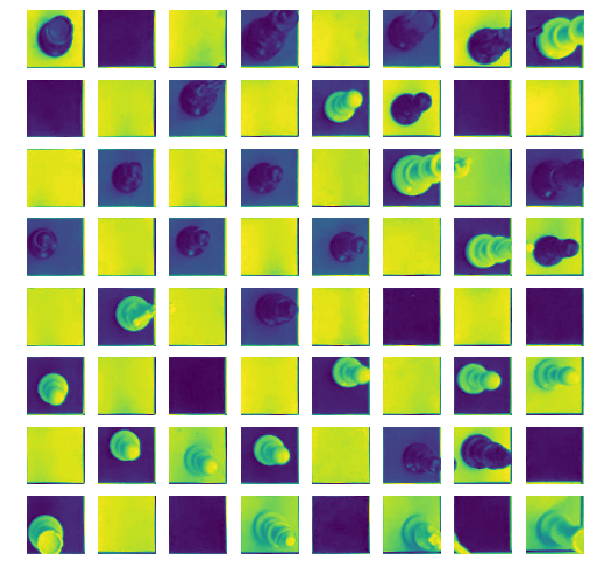

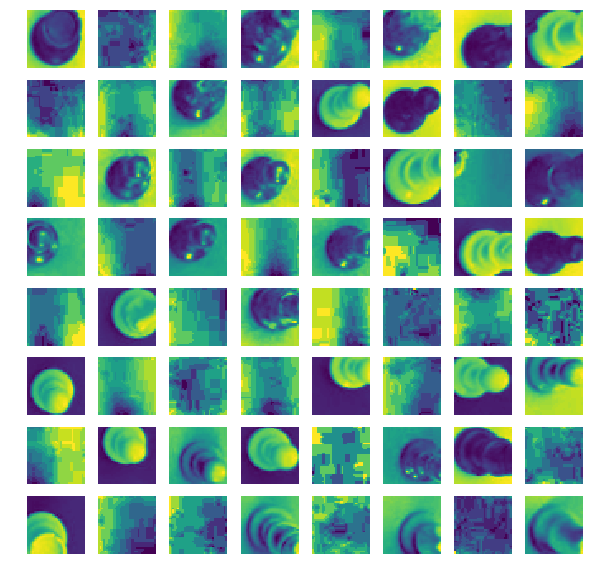

In [9]:
show_full_board(array, center = False)
show_full_board(array, center = True)

In [10]:
def test_f1(a, threshold = 5):
    a = np.sum(cv2.Canny(a, 0, 25))/(255)
    return (a > threshold)

In [11]:
def show_full_board_grayhot(array):
    matrix = np.zeros((8, 8))
    p = 0.2

    for x in range(8):
        for y in range(8):
            matrix[x, y] = 1 if test_f1(center_image(array[x, y], p = p)) else 0

    fig, axs = plt.subplots(8, 8, figsize = (10, 10))
    [axi.set_axis_off() for axi in axs.ravel()]
    for i in range(8):
        for j in range(8):
            if matrix[i, j] == 1:
                cmap = "hot"
            else:
                cmap = "gray"
            axs[i, j].imshow(center_image(array[i, j], boolean = True, p = p), cmap = cmap)
    return matrix

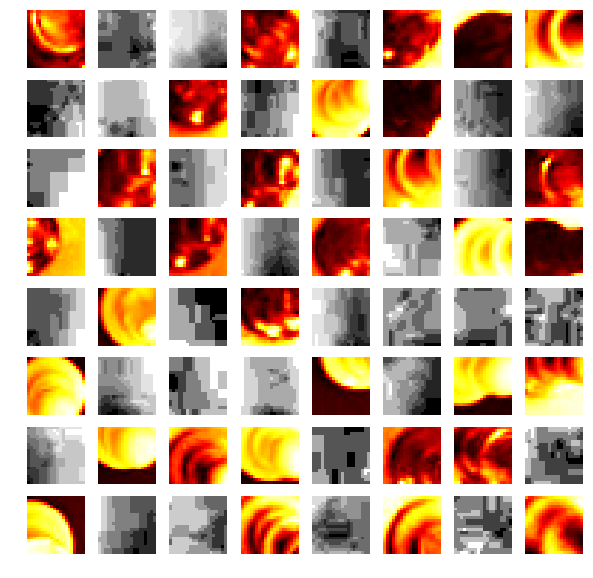

In [12]:
matrix = show_full_board_grayhot(array)

In [13]:
positions = np.transpose(np.nonzero(matrix))

In [14]:
len(positions) == 32

True

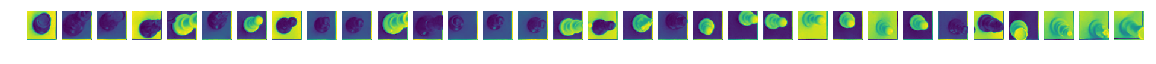

In [15]:
fig, axis = plt.subplots(1, len(positions), figsize = (20, 20))
[ax.set_axis_off() for ax in axis.ravel()]

for i, x in enumerate(positions):
    axis[i].imshow(array[x[0], x[1]])
#     cv2.imwrite("RandomBoard_TestSets/{}/{}.png".format(photo, i), array[x[0], x[1]])